[Источник](https://courses.cs.ut.ee/MTAT.03.227/2015_spring/uploads/Main/home-exercises-5.pdf)

# Одномерная деревня

##### Выполнил: Ахмаджонов Мумтозбек

##### Баллов:   /50

Далее речь пойдет о полностью вымышленном мире, в котором возможны одномерные деревни и прочие привратности судьбы.
Пусть у нас есть одномерная деревня, в которой $N$ домов располагаются на отрезке от $0$ до $l$ км.

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set(font_scale=1.1, style='whitegrid')

Для Вашего удобства ниже написана функция, которая рисует небольшую одномерную деревню.

In [2]:
def plot_village(coordinates, l=1):
    # Checking, that all the coordinates are less than l
    assert (coordinates <= l).all(), 'All the houses should be in a village'
    
    # Draw horizontal line
    plt.hlines(0, 0, l)
    plt.xlim(0, l)
    plt.ylim(-0.5, 0.5)
    
    # Draw house points
    y = np.zeros(np.shape(coordinates))
    plt.title('The Hobbit Village')
    plt.plot(coordinates,y,'o',ms = 10)
    plt.axis('off')
    plt.xlabel('Coordinates')
    fig = plt.gcf()
    fig.set_size_inches(15, 1)
    plt.show()

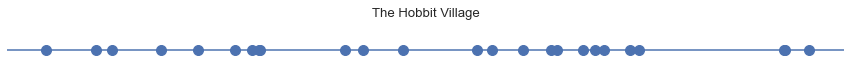

In [3]:
N = 25
l = 1
x = np.random.rand(N)*l
    
plot_village(x, l)

Жители одномерной деревни хотят подключиться к интернету, для этого им необходимо поставить центральную обслуживающую станцию, от которой кабель будет тянуться ко всем домам деревни. Пусть цена кабеля, который надо тянуть от станции до каждого дома независимо, определяется некоторой функцией $p(d)$. Тогда ясно, что деревне придется заплатить следующую сумму за доступ в мировую паутину:
$$
P(w, x) = \sum\limits_{i=1}^N p(d_i) = \sum\limits_{i=1}^N p(|w - x_i|)
$$
Здесь $w$ - координата станции, $x_i$ - координата i-ого домика.

## Задача 1 (1)
Найдите аналитически оптимальную позицию $w^*$, доставляющую минимум функции $P(w, x)$ при условии, что $p(d) = d^2$

$$
\begin{array}{l}
P( w,x) =\sum _{i=1}^{N}( w-x_{i})^{2} =Nw^{2} -2w\sum _{i=1}^{N} x_{i} +\sum _{i=1}^{N} x_{i}^{2}\\
\frac{\partial }{\partial w} P( w,x) =2Nw-2\sum _{i=1}^{N} x_{i}\\
\frac{\partial }{\partial w} P\left( w^{*} ,x\right) =2Nw^{*} -2\sum _{i=1}^{N} x_{i} =0\Longrightarrow w^{*} =\overline{x}
\end{array}
$$

## Задача 2 (2)
Напишите функцию `P`, которая берет на вход позицию станции $w$ и вектор координат $x$ и возвращает значение функции потерь $P$.

In [4]:
def P(w, x):
    return np.sum(np.square(w - x))

Постройте значение функции потерь для значения координат от $0$ до $l$.

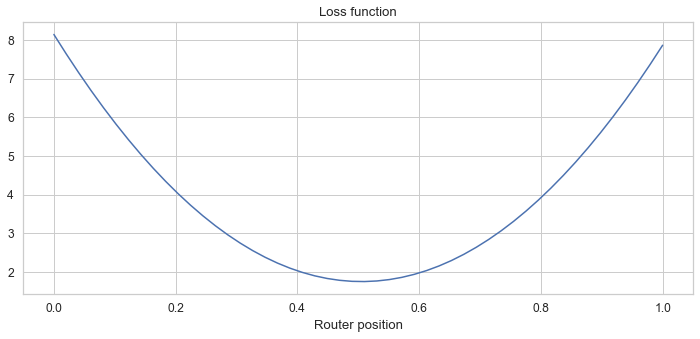

In [5]:
w = np.linspace(0,l)
p = [P(w_i, x) for w_i in w]
plt.title('Loss function')
plt.xlabel('Router position')
plt.plot(w,p)
fig = plt.gcf()
fig.set_size_inches(12, 5)

## Задача 3 (2)
Напишите функцию `dP`, которая берет на вход позицию станции $w$ и вектор координат $x$ и возвращает значение градиента функции потерь $\nabla P$ как функции от $w$.

In [6]:
def dP(w, x):
    return 2 * x.shape[0] * w - 2 * np.sum(x)

Постройте значение функции `dP` для значения координат от $0$ до $l$. Какая точка на графике представляет особый интерес? Почему?

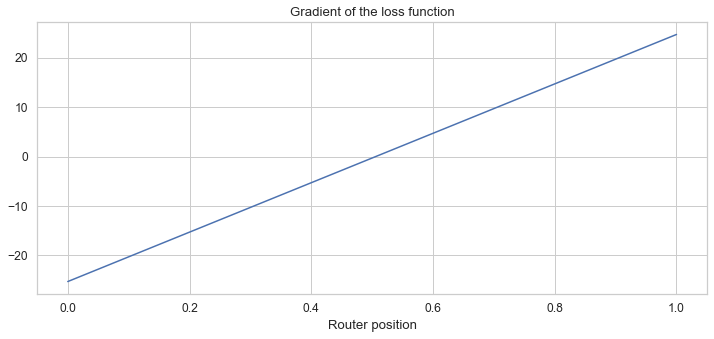

In [7]:
w = np.linspace(0,l)
dp = [dP(w_i, x) for w_i in w]
plt.title('Gradient of the loss function')
plt.xlabel('Router position')
plt.plot(w,dp)
fig = plt.gcf()
fig.set_size_inches(12, 5)

Нам интересна точка, где dP = 0, т.к. в этой точке достигается минимум Лосса.

## Задача 4 (2)
Напишите функцию `gradient_descent`, которая возвращает значение $w_k$ через фиксированное число шагов. Длина функции не должна превышать 5 строчек кода.

$$
w_{k+1} = w_k - \mu \nabla P(w_k)
$$

In [8]:
EPS = 1e-3

from copy import deepcopy

def gradient_descent(x, P, dP, w0, mu, Nsteps):
    w = deepcopy(w0)
    for i in range(1, Nsteps + 1):
        w -= mu * dP(w, x)
        if np.abs(dP(w, x)) < EPS: break
    return w

In [9]:
round(gradient_descent(x, P, dP, 0., 3e-4, 2000), 10)

0.5055524783

## Задача 5 (2)
Модифицируйте функцию `gradient_descent` так, чтобы она возвращала всю траекторию оптимизации (все значения $w_k$). Постройте графики $P(w_k ,x)$ для $\mu = 0.01, 0.1, 0.15, 0.19, 0.20, 0.21$ . Сделайте выводы.

In [10]:
import math

def gradient_descent(x, P, dP, w0, mu, Nsteps):
    traj = [w0]
    w = deepcopy(w0)
    for i in range(1, Nsteps + 1):
        w -= mu * dP(w, x)
        traj.append(w)
        new_grad = dP(w,x)
        if math.isnan(new_grad) or math.isinf(new_grad):
            break
        if np.abs(new_grad) < EPS:
            break
    return traj

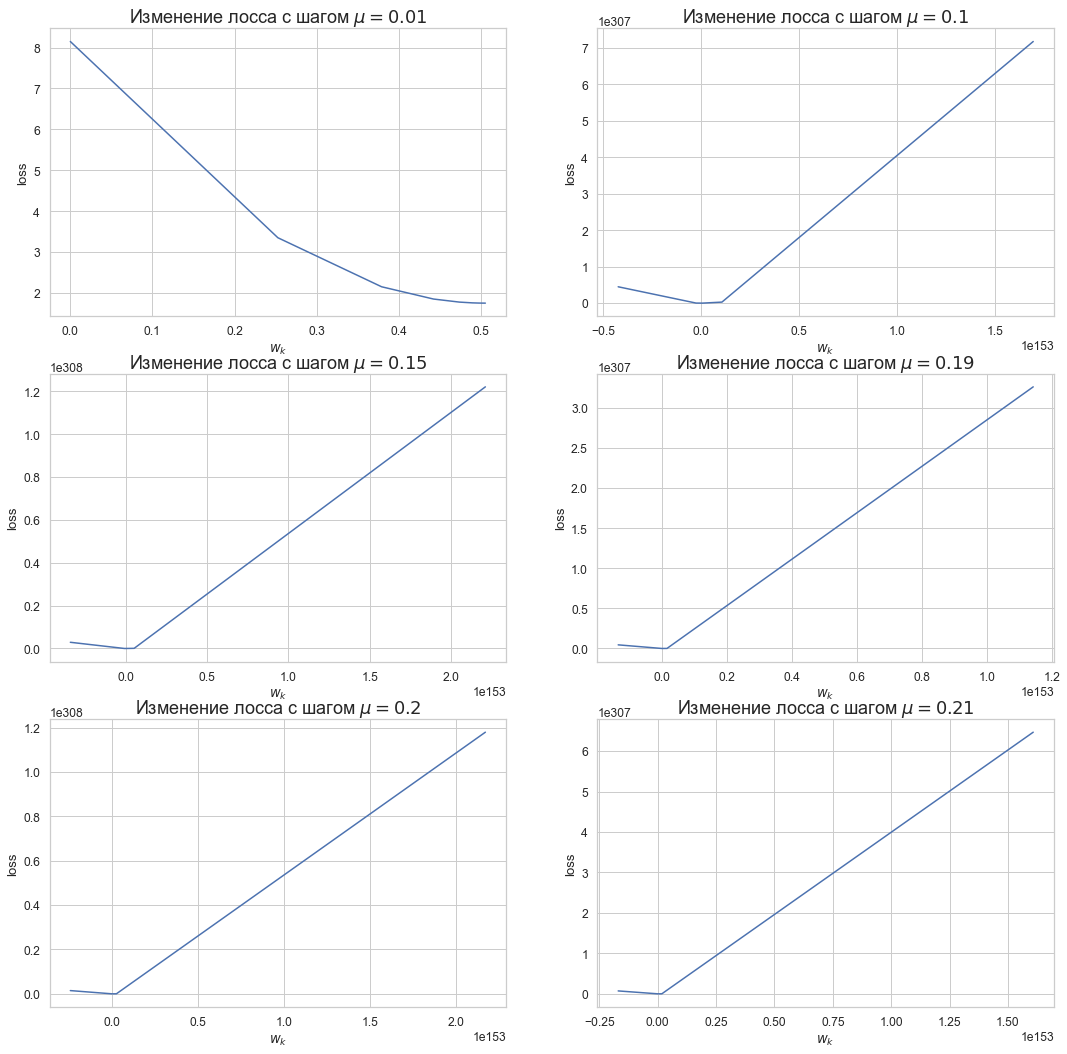

In [11]:
import warnings
warnings.filterwarnings('ignore')

mu_arr = [0.01, 0.1, 0.15, 0.19, 0.20, 0.21]
fig, axes = plt.subplots(len(mu_arr) // 2, 2, figsize=(18, 18))
for i, mu in enumerate(mu_arr, 0):
    traj = gradient_descent(x, P, dP, 0., mu, 1000)
    P_vals = [P(w_k, x) for w_k in traj]
    sns.lineplot(ax=axes[i // 2, i % 2], x=traj, y=P_vals)
    axes[i // 2, i % 2].set_title(f"Изменение лосса с шагом $\\mu={mu}$", fontsize=18)
    axes[i // 2, i % 2].set_xlabel("$w_k$")
    axes[i // 2, i % 2].set_ylabel("loss")
plt.show()

__Вывод:__ Как видим, ГС сходится только при шаге обучения 0.01, а остальные шаги оказались слишком большими.

## Задача 6 (2)
Напишите функцию `ddP`, которая берет на вход позицию станции $w$ и вектор координат $x$ и возвращает значение гессиана функции потерь $\nabla^2 P$ как функции от $w$.

$$
\frac{\partial ^{2}}{\partial w^{2}} P( w,x) =2N
$$

In [12]:
def ddP(w, x):
    return 2 * x.shape[0]

Постройте значение функции `ddP` для значения координат от $0$ до $l$.

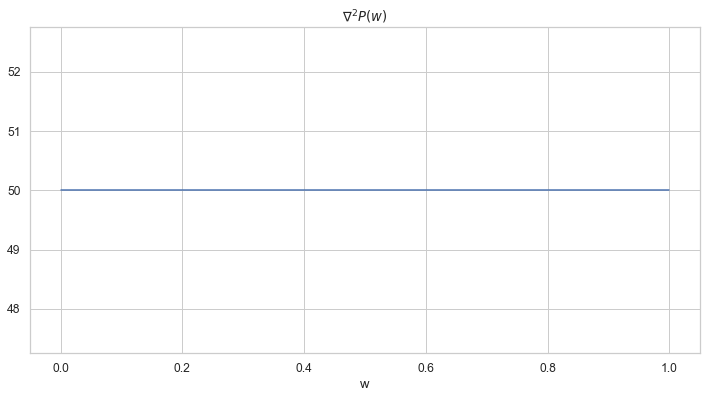

In [13]:
ddp = [ddP(w_i, x) for w_i in w]
plt.figure(figsize=(12, 6))
sns.lineplot(x=w, y=ddp)
plt.title("$\\nabla ^2P(w)$")
plt.xlabel("w")
plt.show()

## Задача 7 (3)
Напишите функцию `newton_descent`, которая возвращает всю оптимизационную траекторию $(w_k)$ через фиксированное число шагов.

In [14]:
def newton_descent(x, P, dP, ddP, w0, Nsteps):
    traj = [w0]
    w = deepcopy(w0)
    for i in range(1, Nsteps + 1):
        w -= dP(w, x) / ddP(w, x)
        traj.append(w)
        new_grad = dP(w,x)
        stop_crit = np.transpose(new_grad) * (1 / ddP(w, x) * new_grad) / 2
        if math.isnan(stop_crit) or math.isinf(stop_crit):
            break
        if np.abs(stop_crit) < EPS:
            break
    return traj

Сравните траекторию метода с траекторией градиентного спуска. Исследуйте поведение метода Ньютона в зависимости от разной стартовой точки $w_0$.

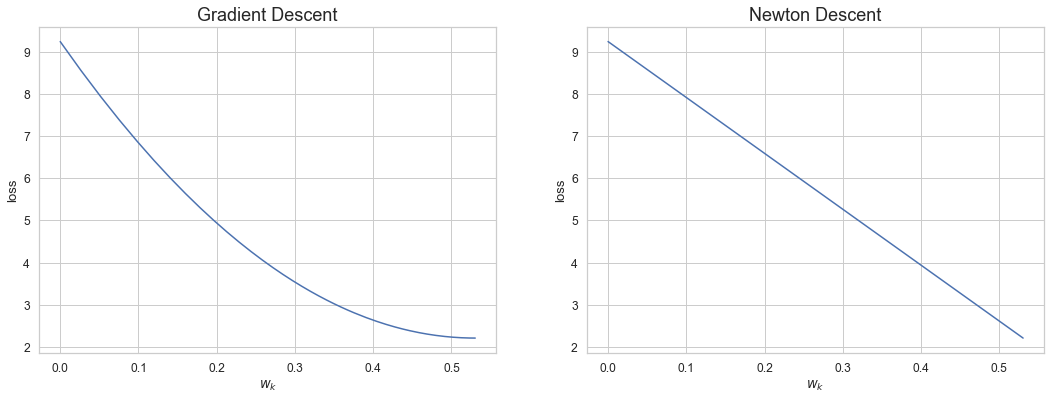

In [15]:
N = 25
l = 1
x = np.random.rand(N)*l

fig, axes = plt.subplots(1, 2, figsize=(18, 6))
gd_traj = gradient_descent(x, P, dP, 0., 0.001, 2000)
nw_traj = newton_descent(x, P, dP, ddP, 0., 2)
gd_P_vals = [P(w_k, x) for w_k in gd_traj]
nw_P_vals = [P(w_k, x) for w_k in nw_traj]

sns.lineplot(ax=axes[0], x=gd_traj, y=gd_P_vals)
axes[0].set_title(f"Gradient Descent", fontsize=18)
axes[0].set_xlabel("$w_k$")
axes[0].set_ylabel("loss")

sns.lineplot(ax=axes[1], x=nw_traj, y=nw_P_vals)
axes[1].set_title(f"Newton Descent", fontsize=18)
axes[1].set_xlabel("$w_k$")
axes[1].set_ylabel("loss")

plt.show()

как можно увидеть из графика, град спуск сошелся медленнее, а Ньютоновский метод за один шаг, как и в теории, т.к. функция ошибки квадратична.

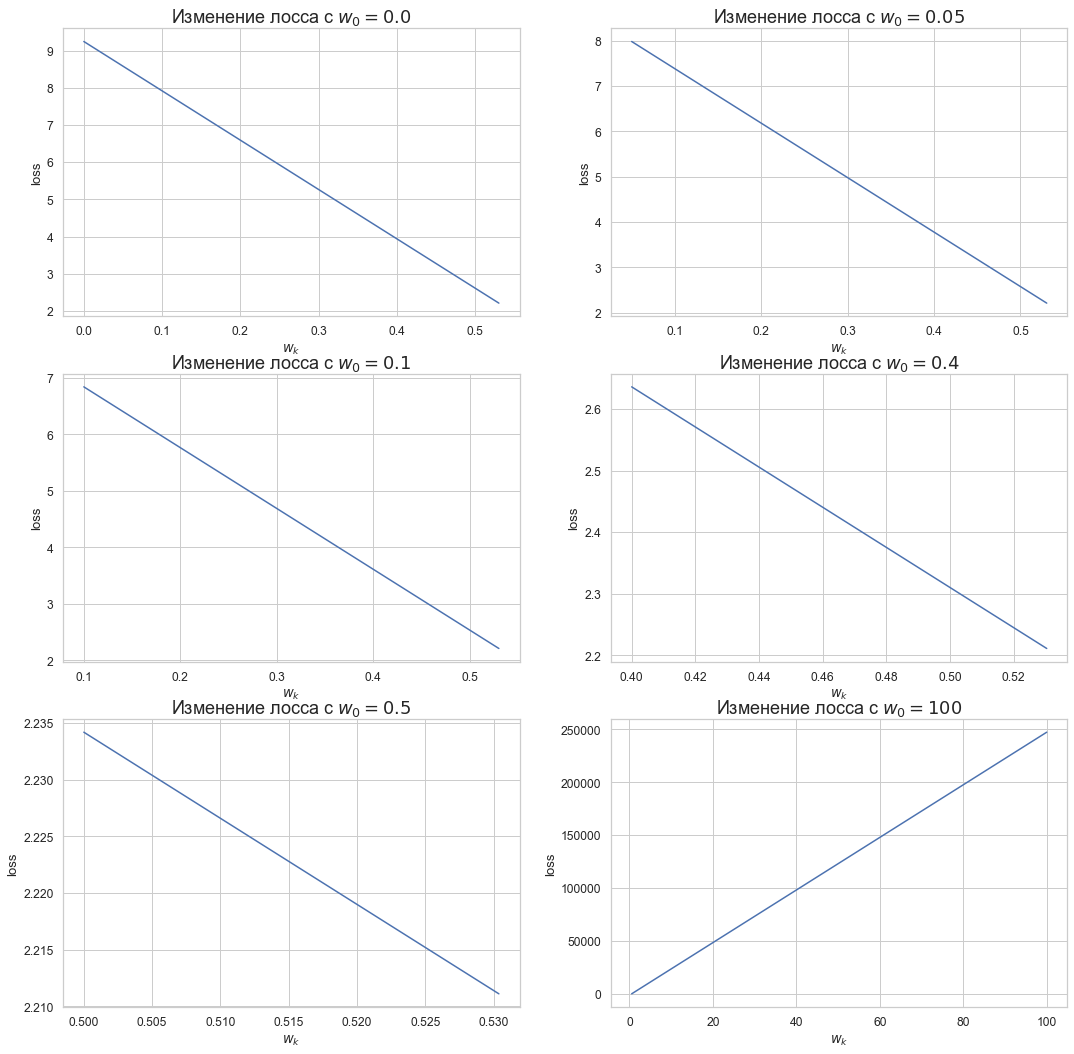

[1, 1, 1, 1, 1, 1]


In [16]:
iter_times = []

w_zeros = [0.0, 0.05, 0.1, 0.4, 0.5, 100]
fig, axes = plt.subplots(len(w_zeros) // 2, 2, figsize=(18, 18))
for i, w0 in enumerate(w_zeros, 0):
    traj = newton_descent(x, P, dP, ddP, w0, 2)
    iter_times.append(len(traj) - 1)
    P_vals = [P(w_k, x) for w_k in traj]
    sns.lineplot(ax=axes[i // 2, i % 2], x=traj, y=P_vals)
    axes[i // 2, i % 2].set_title(f"Изменение лосса с $w_0={w0}$", fontsize=18)
    axes[i // 2, i % 2].set_xlabel("$w_k$")
    axes[i // 2, i % 2].set_ylabel("loss")
plt.show()
print(iter_times)

__Наблюдение:__ Как видно из графиков, если брать слишком большие значения стартовых точек, то можно наблюдать и расхождение в методе.

Давайте нарисуем оптимальное положение роутера в деревне хоббитцов:

In [17]:
def plot_village_with_internet(coordinates, router_coordinates, l=1):
    # Checking, that all the coordinates are less than l
    assert (np.array(coordinates) <= l).all(), 'All the houses should be in the village'
    assert (np.array(router_coordinates) <= l).all(), 'Router should be in the village'
    
    # Draw horizontal line
    plt.hlines(0, 0, l)
    plt.xlim(0, l)
    plt.ylim(-0.5, 0.5)
    
    # Draw house points
    y = np.zeros(np.shape(coordinates))
    plt.title('Modern Hobbit Village')
    plt.plot(coordinates,y,'o',ms = 10)  
    
    # Draw routers
    y = np.zeros(np.shape(router_coordinates))
    plt.plot(router_coordinates,y,'*',ms = 50)
    plt.axis('off')
    plt.xlabel('Coordinates')
    fig = plt.gcf()
    fig.set_size_inches(15, 1)
    plt.show()

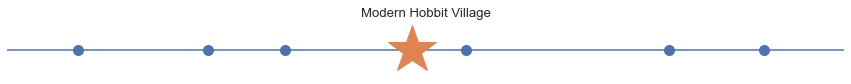

In [18]:
N = 6
l = 1
x = np.random.rand(N)*l

w_ = newton_descent(x, P, dP, ddP, 0, 2)[-1]
    
plot_village_with_internet(x, w_, l)

## Задача 8 (3)
Напишите функцию `stochastic_gradient_descent`, которая возвращает всю оптимизационную траекторию $(w_k)$ через фиксированное число шагов по методу стохастического градиентного спуска (градиент считается не по всем домикам деревни хоббитцов, а по случайному подмножеству)

In [19]:
# Stochastic Gradient
def dP_sigma(w, x, p=0.5):
    random_mask = np.array(np.random.binomial(1, p, x.shape), dtype=bool)
    return dP(w, x[random_mask])

EPS = 1e-3

def stochastic_gradient_descent(x, P, dP_sigma, w0, mu, Nsteps):
    traj = [w0]
    w = deepcopy(w0)
    for i in range(1, Nsteps + 1):
        w -= mu * dP_sigma(w, x)
        traj.append(w)
        stop_crit = np.abs(traj[i] - traj[i - 1])
        if math.isnan(stop_crit) or math.isinf(stop_crit):
            break
        if stop_crit < EPS:
            break
    return traj

Увеличьте число домиков до $50$, сравните траектории алгоритмов градиентного и стохастического градиентного спуска. Сравните их.

Hint: придется изменить размер шага, чтобы работало:)

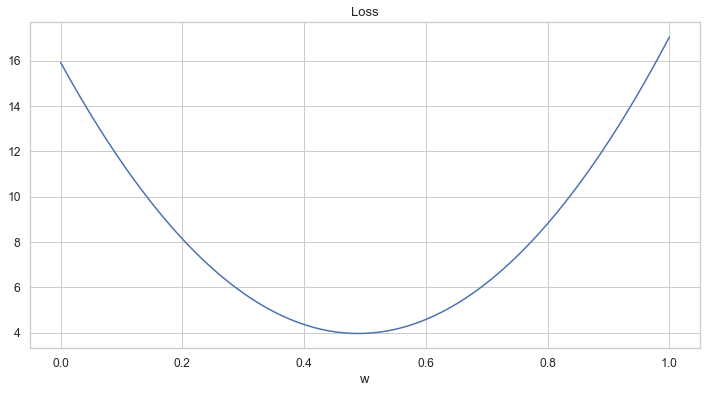

In [20]:
N = 50
l = 1
x = np.random.rand(N)*l
w = np.linspace(0, l, 100)

tmp_p = [P(w_i, x) for w_i in w]
plt.figure(figsize=(12, 6))
sns.lineplot(x=w, y=tmp_p)
plt.title("Loss")
plt.xlabel("w")
plt.show()

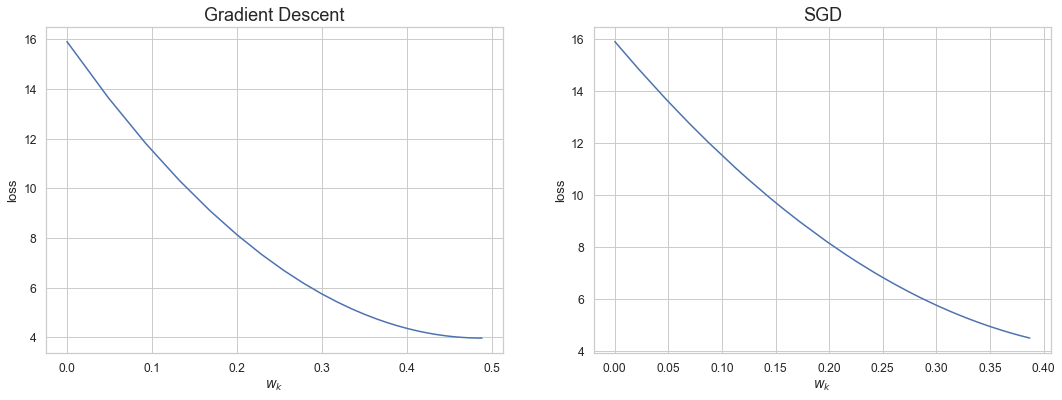

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
gd_traj = gradient_descent(x, P, dP, 0., 0.001, 2000)
sgd_traj = stochastic_gradient_descent(x, P, dP_sigma, 0., 0.001, 5000)
gd_P_vals = [P(w_k, x) for w_k in gd_traj]
sgd_P_vals = [P(w_k, x) for w_k in sgd_traj]

sns.lineplot(ax=axes[0], x=gd_traj, y=gd_P_vals)
axes[0].set_title(f"Gradient Descent", fontsize=18)
axes[0].set_xlabel("$w_k$")
axes[0].set_ylabel("loss")

sns.lineplot(ax=axes[1], x=sgd_traj, y=sgd_P_vals)
axes[1].set_title(f"SGD", fontsize=18)
axes[1].set_xlabel("$w_k$")
axes[1].set_ylabel("loss")

plt.show()

In [22]:
len(sgd_traj), len(gd_traj)

(33, 104)

__Наблюдение:__ как можем увидеть, SGD сошелся намного быстрее обычного град.спуска, но минимум функции нашел слегка хуже чем град спуск.

Только-только жизнь обитателей одномерной деревни наладилась, как роскомнадзор (казалось бы, какое ему дело) сказал, что цена на кабель должна считаться совсем по другой формуле: 
$$
p(d) = |d|
$$

## Задача 9 (3)
Напишите функции `P`, `dP`, `ddP` в новых реалиях. Постройте их для заданного $x$ при различных $w$.

$$
 \begin{array}{l}
P( w,x) =\sum _{i=1}^{N} |w-x_{i}| \\
\frac{\partial }{\partial w} P( w,x) =\sum _{i=1}^{N}\mathbf{sign}( w-x_{i})\\
\frac{\partial ^{2}}{\partial w^{2}} P( w,x) =0
\end{array}
$$

In [23]:
def P(w, x):
    return np.sum(np.abs(w - x))

def dP(w, x):
    return np.sum(np.sign(w - x))

def ddP(w, x):
    return 0.

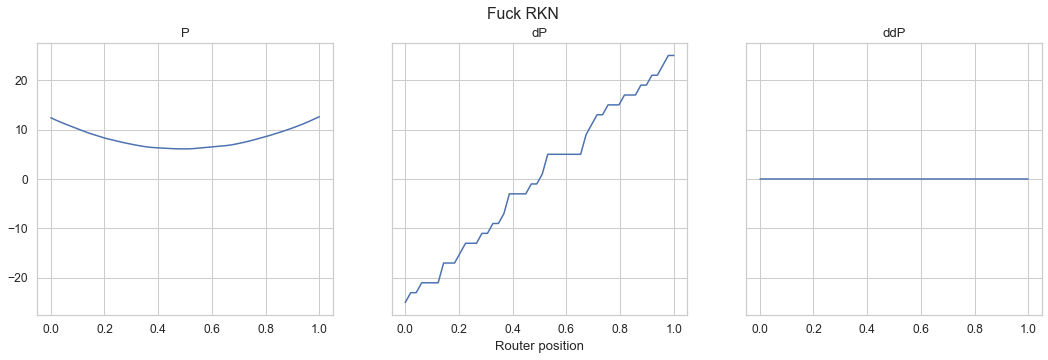

In [24]:
N = 25
l = 1
x = np.random.rand(N)*l

w = np.linspace(0,l)

p = [P(w_i, x) for w_i in w]
dp = [dP(w_i, x) for w_i in w]
ddp = [ddP(w_i, x) for w_i in w]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
ax1.plot(w,p)
ax1.set_title('P')
ax2.plot(w,dp)
ax2.set_title('dP')
ax3.plot(w,ddp)
ax3.set_title('ddP')
ax2.set_xlabel('Router position')
f.set_size_inches(18, 5)
f.suptitle('Fuck RKN')
plt.show()

Найдите оптимальное значение $w^*$ в новых реалиях.

Рассмотрим:
\begin{equation*}
x_{( 1)} \leqslant x_{(2)}\leqslant \dotsc \leqslant x_{( N)}
\end{equation*}
Тогда, выборочная медиана вектора $\displaystyle x$ будет $\displaystyle w^{*}$. Т.е. если $\displaystyle m=\frac{N}{2}$:
\begin{equation*}
w^{*} =\frac{x_{( m)} +x_{( m+1)}}{2}
\end{equation*}

## Задача 10 (2)
Постройте траекторию градиентного спуска в новых реалиях. Что Вы скажете роскомнадзору, когда он потребует решать эту задачу методом Ньютона (потому что они где то слышали, что надо использовать лучшие мировые практики)?

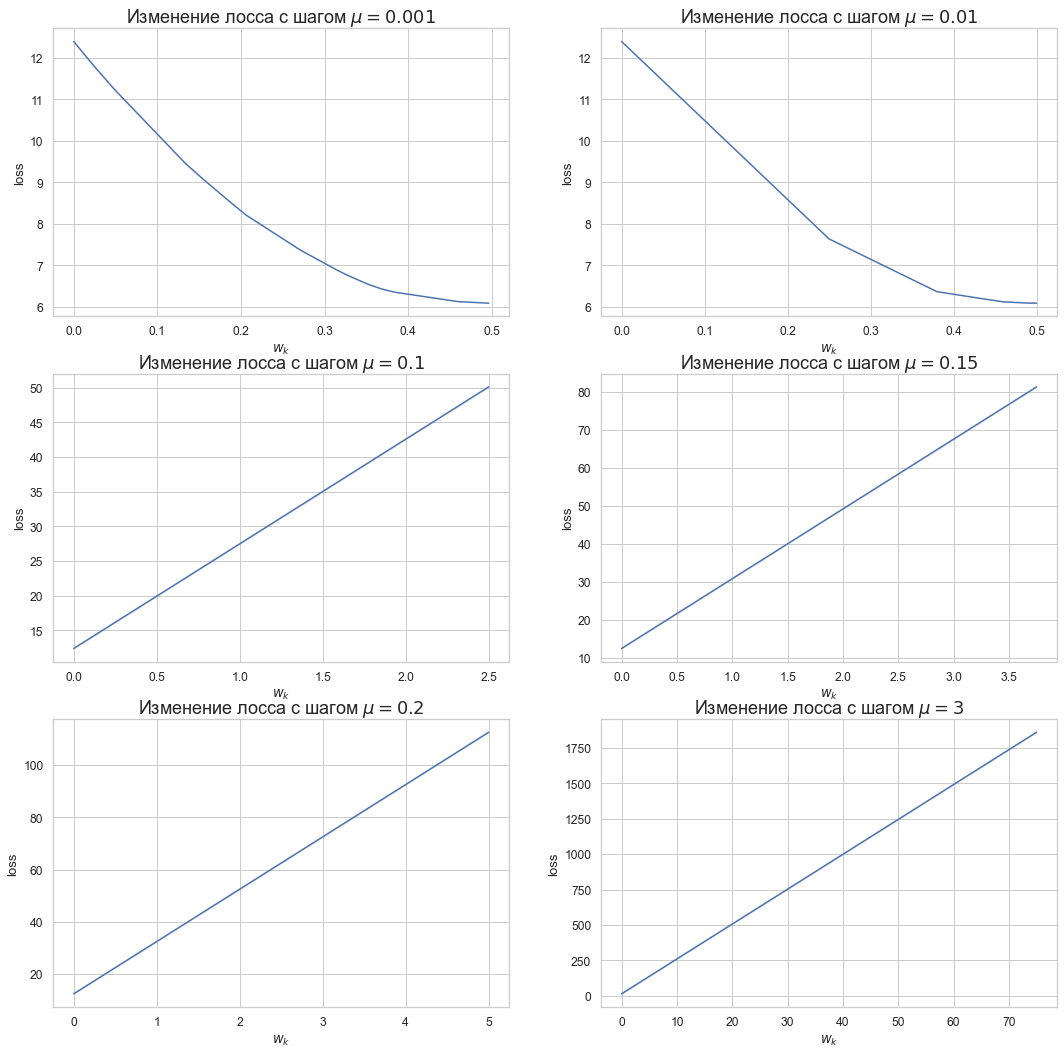

[500, 500, 500, 500, 500, 500]


In [25]:
iters = []

mu_arr = [0.001, 0.01, 0.1, 0.15, 0.20, 3]
fig, axes = plt.subplots(len(mu_arr) // 2, 2, figsize=(18, 18))
for i, mu in enumerate(mu_arr, 0):
    traj = gradient_descent(x, P, dP, 0., mu, 500)
    iters.append(len(traj) - 1)
    P_vals = [P(w_k, x) for w_k in traj]
    sns.lineplot(ax=axes[i // 2, i % 2], x=traj, y=P_vals)
    axes[i // 2, i % 2].set_title(f"Изменение лосса с шагом $\\mu={mu}$", fontsize=18)
    axes[i // 2, i % 2].set_xlabel("$w_k$")
    axes[i // 2, i % 2].set_ylabel("loss")
plt.show()
print(iters)

In [26]:
np.median(x)

0.4955009850459593

Как видим, при больших шагах наблюдается расхождение.

Что касается метода ньютона, вторая производная оказалась нулевой, поэтому новые технологии не применить :( Скажу "Fu*k You, bois)"

## Задача 11 (3)
Реализуйте функции `dP_sigma`, `stochastic_gradient_descent` в новых реалиях.

In [27]:
def dP_sigma(w, x, p=0.1):
    random_mask = np.array(np.random.binomial(1, p, x.shape), dtype=bool)
    return dP(w, x[random_mask])

def stochastic_gradient_descent(x, P, dP_sigma, w0, mu, Nsteps, p=0.1):
    traj = [w0]
    w = deepcopy(w0)
    for i in range(1, Nsteps + 1):
        w -= mu * dP_sigma(w, x, p)
        traj.append(w)
        stop_crit = np.abs(traj[i] - traj[i - 1])
        if math.isnan(stop_crit) or math.isinf(stop_crit):
            break
        if stop_crit < EPS:
            break
    return traj

Постройте траектории градиентного и стохастического градиентного спуска. Поэксперементируйте с уровнем шума в стох. градиенте путем изменения доли домиков, по которым считается градиент ($p$). Проведите эксперименты для большого числа домиков (от $10000$) и сравните результаты.

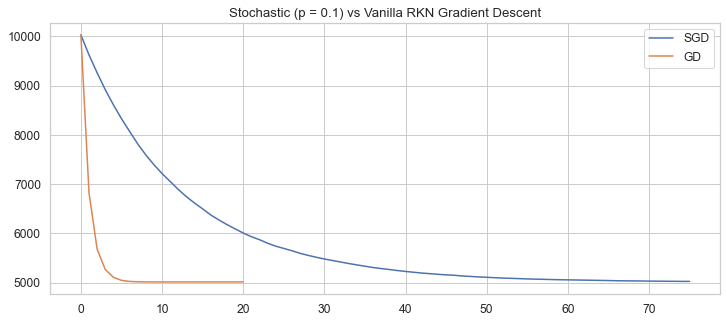

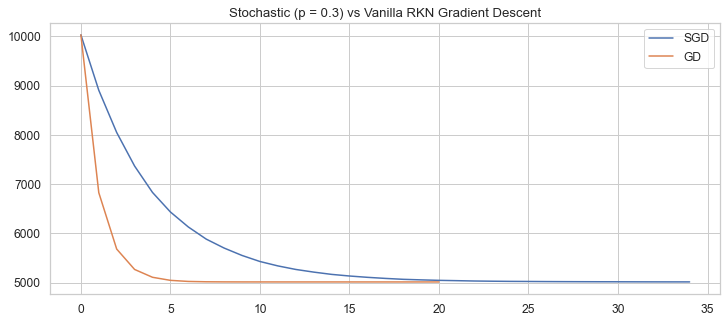

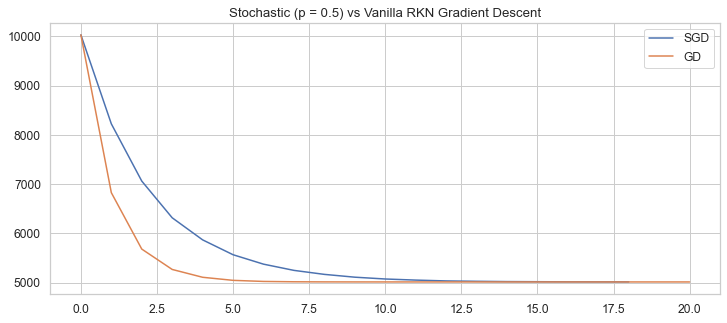

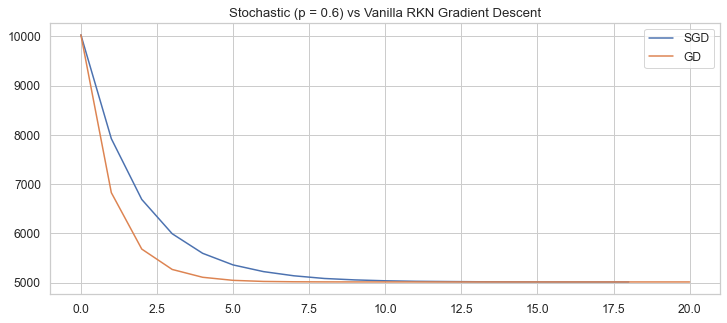

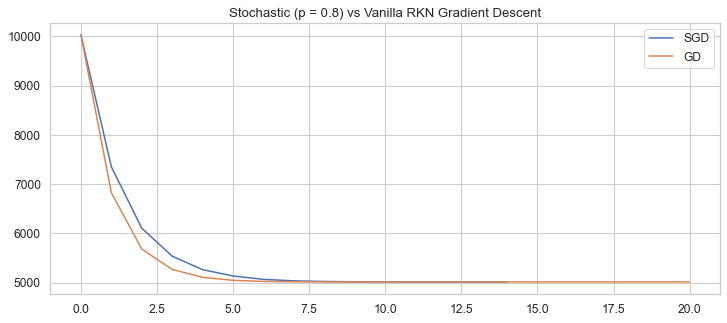

In [31]:
N = int(2e4)
l = 1
x = np.random.rand(N)*l
mu = 0.00001

p_arr = [0.1, 0.3, 0.5, 0.6, 0.8]
for p in p_arr:
    list_gr = gradient_descent(x, P, dP, 0, mu, 100)
    P_gr =[P(w_, x) for w_ in list_gr]

    list_sgd = stochastic_gradient_descent(x, P, dP_sigma, 0, mu, 100, p=p)
    P_sgd =[P(w_, x) for w_ in list_sgd]

    plt.title(f'Stochastic (p = {p}) vs Vanilla RKN Gradient Descent')

    plt.plot(P_sgd, label='SGD')
    plt.plot(P_gr, label='GD')
    plt.legend()
    fig = plt.gcf()
    fig = plt.gcf()
    fig.set_size_inches(12, 5)
    plt.show()

__Наблюдение:__ Видим, что с ростом $p$, оба метода начинают себя вести примерно одинаково. Что достаточно очевидно, т.к. с увеличением количества домов по которым считаем градиент мы все становимся ближе к подсчету реального значения градиента как при обычном ГС.

Дела шли своим чередом в деревне хоббитцов. Однако, как и всякое процветающее общество (коим без всяких сомнений себя считали хоббитцы), они решили, что их количество увеличилось достаточно для того, чтобы поставить второй датацетр (роутер) и проводить интернет к каждому дому от ближайшего к нему роутера.
$$
P(w_1, w_2, x) = \sum\limits_{i=1}^N p(d_i) = \sum\limits_{i=1}^N p\left(\min\left(\left|w_1 - x_i\right|, \left|w_2 - x_i\right|\right)\right)
$$

## Задача 12 (2)
Напишите функции `P`, `dP` в новых реалиях. Постройте их для заданного $x$ при различных $w_1, w_2$. Помните, что градиент в этом случае представляет собой двумерный вектор.

In [33]:
def P(w1, w2, x):
    return np.sum(np.minimum(np.abs(w1 - x), np.abs(w2 - x)))

def dP(w1, w2, x):
    abs_1 = np.abs(w1 - x)
    abs_2 = np.abs(w2 - x)
    le_mask = abs_1 < abs_2
    ge_mask = abs_1 >= abs_2
    dP_dw1 = np.sum(np.sign(w1 - x[le_mask]))
    dP_dw2 = np.sum(np.sign(w2 - x[ge_mask]))
    return [dP_dw1, dP_dw2]

Постройте графики $P(w_1, w_2), \nabla P(w_1, w_2)$ для различных значений $N$. Прокомментируйте, что происходит по мере увеличения $N$.

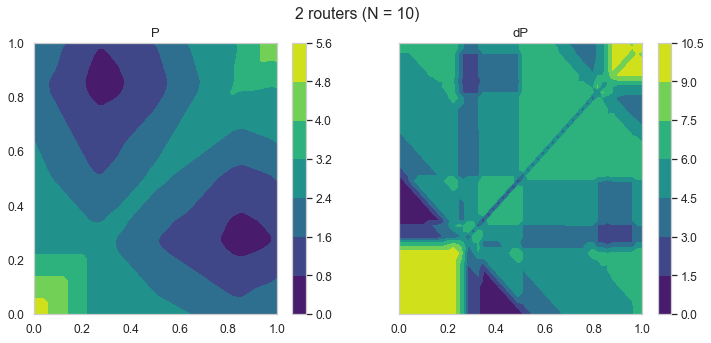

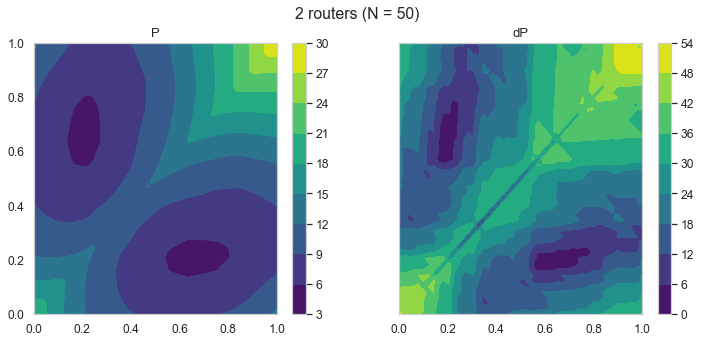

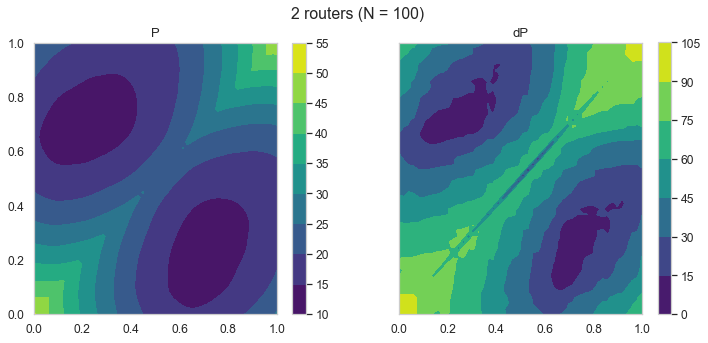

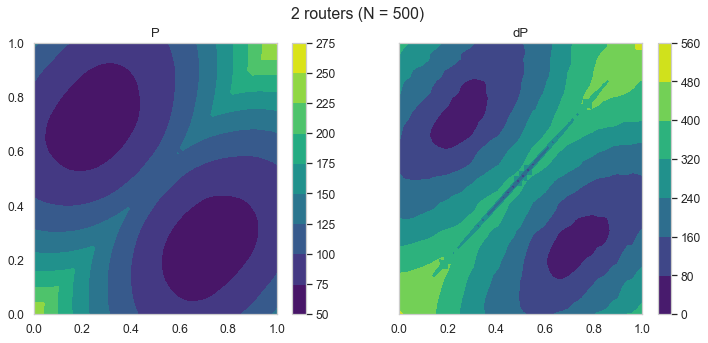

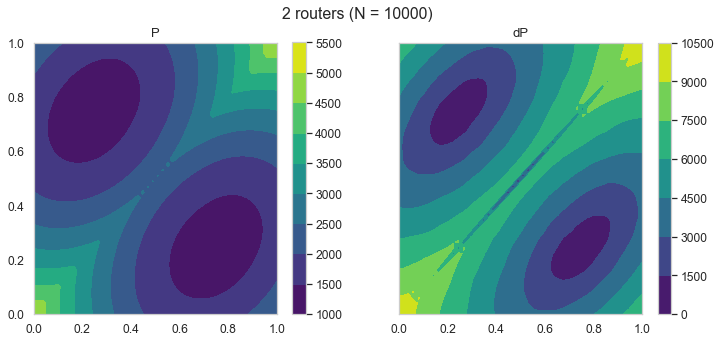

In [34]:
N_arr = [10, 50, 100, 500, 10000]
for N in N_arr:
    l = 1
    x = np.random.rand(N)*l

    w1 = np.linspace(0,l)
    w2 = np.linspace(0,l)

    p = np.zeros([w1.shape[0], w1.shape[0]])
    dp = np.zeros([w1.shape[0], w1.shape[0]])

    i = 0
    for w1_ in w1:
        j = 0
        for w2_ in w2:
            p[i][j]  =  P(w1_, w2_, x)
            dp[i][j] = np.linalg.norm(dP(w1_, w2_, x))
            j += 1
        i += 1

    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    c1 = ax1.contourf(w1, w2, p, cmap="viridis")
    plt.colorbar(c1, ax = ax1)
    ax1.set_title('P')
    c2 = ax2.contourf(w1, w2, dp, cmap="viridis")
    plt.colorbar(c2, ax = ax2)
    ax2.set_title('dP')

    f.set_size_inches(12, 5)
    f.suptitle(f'2 routers (N = {N})')
    plt.show()

__Наблюдение:__ при увеличении N, контур сглаживается и для норм градиентов и для функции самой.

## Задача 13 (4)
Напишите функцию `gradient_descent`, которая возвращает всю оптимизационную траекторию $(w_k)$ через фиксированное число шагов и рисует процесс на графиках $P$ и $\nabla P$, что были выше (анимацию).

In [35]:
from IPython import display
N = 10000
l = 1
x = np.random.rand(N)*l

w1 = np.linspace(0,l)
w2 = np.linspace(0,l)

p = np.zeros([w1.shape[0], w1.shape[0]])
dp = np.zeros([w1.shape[0], w1.shape[0]])

i = 0
for w1_ in w1:
    j = 0
    for w2_ in w2:
        p[i][j]  =  P(w1_, w2_, x)
        dp[i][j] = np.linalg.norm(dP(w1_, w2_, x))
        j += 1
    i += 1

def draw_descent(x_data, y_data):
    display.clear_output(wait=True)
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    c1 = ax1.contourf(w1, w2, p, cmap="viridis")
    plt.colorbar(c1, ax = ax1)
    ax1.set_title('P')
    c2 = ax2.contourf(w1, w2, dp, cmap="viridis")
    plt.colorbar(c2, ax = ax2)
    ax2.set_title('dP')
    tmp_w = np.array(traj)
    sns.lineplot(ax=ax1, y=y_data, x=x_data, color="red")
    sns.lineplot(ax=ax2, y=y_data, x=x_data, color="red")
    f.set_size_inches(12, 5)
    f.suptitle(f'2 routers')
    plt.show()

In [36]:
def gradient_descent(x, P, dP, w0, mu, Nsteps):
    traj = [[w0[0], w0[1]]]
    w = deepcopy(w0)
    for i in range(1, Nsteps + 1):
        old_grad = dP(w[0], w[1], x)
        w[0] -= mu * old_grad[0]
        w[1] -= mu * old_grad[1]
        traj.append([w[0], w[1]])
        
        # visualize
        tmp_w = np.array(traj)
        draw_descent(tmp_w[:, 1], tmp_w[:, 0])
    return traj

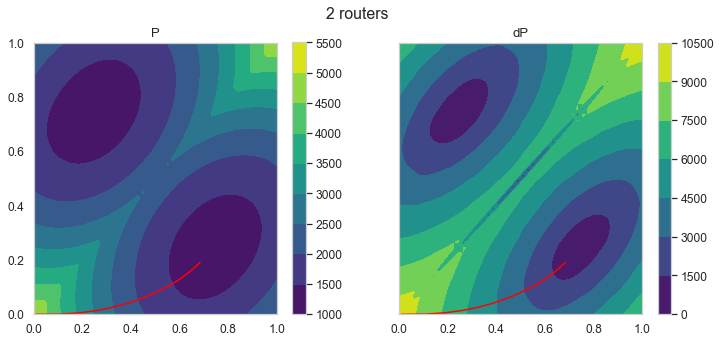

In [37]:
ret = gradient_descent(x, P, dP, [0., 0.01], 0.00001, 20)

__Warning:__ анимация срабатывает при запруске кода только, в итоге остается готовая картина.

## Задача 14 (4)
Напишите функцию `stochastic_gradient_descent`, которая возвращает всю оптимизационную траекторию $(w_k)$ метода стохастического градиентного спуска через фиксированное число шагов и рисует процесс на графиках $P$ и $\nabla P$, что были выше (анимацию).

In [38]:
def dP_sigma(w1, w2, x, p=0.5):
    random_mask = np.array(np.random.binomial(1, p, x.shape), dtype=bool)
    return dP(w1, w2, x[random_mask])

def stochastic_gradient_descent(x, P, dP_sigma, w0, mu, Nsteps):
    traj = [[w0[0], w0[1]]]
    w = deepcopy(w0)
    for i in range(1, Nsteps + 1):
        old_grad = dP_sigma(w[0], w[1], x)
        w[0] -= mu * old_grad[0]
        w[1] -= mu * old_grad[1]
        traj.append([w[0], w[1]])
        
        # visualize
        tmp_w = np.array(traj)
        draw_descent(tmp_w[:, 1], tmp_w[:, 0])
    return traj

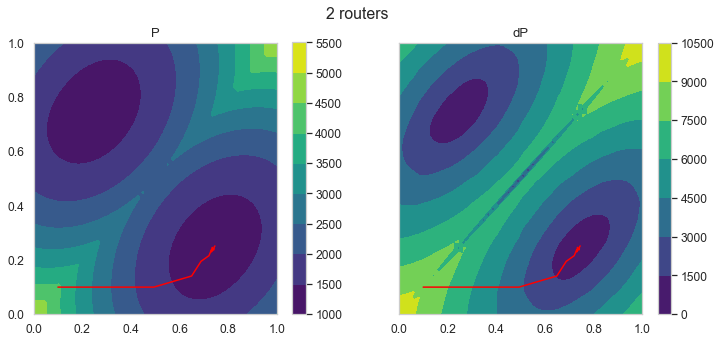

In [40]:
ret = stochastic_gradient_descent(x, P, dP_sigma, [0.1, 0.1], 0.0001, 12)

## Задача 15 (4)
На практике Вам не так часто нужно будет писать свой собстенный алгоритм оптимизации. Решите поставленную выше задачу (2 станции, роскомнадзоровская норма) любым алгоритмом оптимизации из любой библиотеки Python. (cvxpy, scipy и т.д.)
Нарисуйте такие же анимашки.

In [41]:
from scipy.optimize import minimize

In [45]:
N = 1000
l = 1
x = np.random.rand(N)*l

w1 = np.linspace(0,l)
w2 = np.linspace(0,l)

p = np.zeros([w1.shape[0], w1.shape[0]])
dp = np.zeros([w1.shape[0], w1.shape[0]])

i = 0
for w1_ in w1:
    j = 0
    for w2_ in w2:
        p[i][j]  =  P(w1_, w2_, x)
        dp[i][j] = np.linalg.norm(dP(w1_, w2_, x))
        j += 1
    i += 1

def loss(w):
    return P(w[0], w[1], x)

def dloss(w):
    return dP(w[0], w[1], x)

traj = []

res = minimize(loss, [0.0, 0.0], method="BFGS", jac=dloss, callback=traj.append)
res

      fun: 122.17613277416788
 hess_inv: array([[0.00032795, 0.00014802],
       [0.00014802, 0.00017272]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 17
      nit: 12
     njev: 17
   status: 0
  success: True
        x: array([0.23701929, 0.76154864])

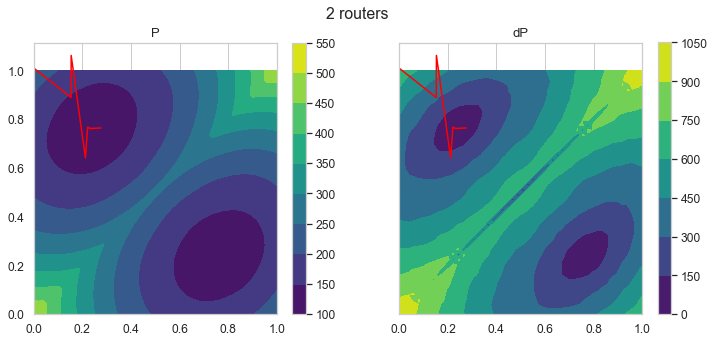

In [46]:
from time import sleep
traj = np.array(traj)
for i in range(1, traj.shape[0] + 1):
    draw_descent(traj[:i, 0], traj[:i, 1])
    sleep(0.2)
    display.clear_output(wait=True)

Одномерная деревня научилась решать свои проблемы при любом числе и раположении жителей в мгновение ока. Улучшив качество интернета, хоббитцы смотрели онлайн-курсы и мемесы и жили припеваючи. Как Вы могли догадаться, роскомнадзору это не очень по душе. Вот тут то они выкатили новое требование о том, что дата-центры (роутеры) должны стоять не более, чем на расстоянии половины деревни друг от друга, чтобы силовым структурам было легче собирать информацию о том, как используют интернет жители деревни Одномерново.

$$
\left|w_1 - w_2\right| \leq \dfrac{l}{2}
$$

## Задача 16 (2)
Нарисуйте на плоскости допустимое множество решений. Выпукло ли оно?

In [73]:
np.arange(0, 400, 8).shape

(50,)

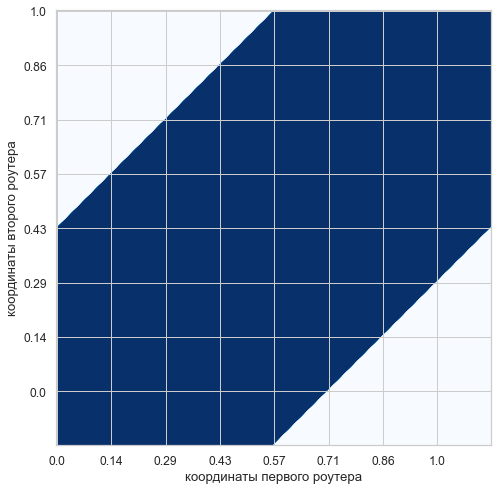

In [95]:
l = 1
w1 = np.linspace(0, l, 400)
w2 = np.linspace(0, l, 400)

oblast = w2 - w1.reshape((w1.shape[0], 1))
oblast = np.array(np.abs(oblast) <= (l / 2), dtype=np.float32)

plt.figure(figsize=(10, 8))
plt.imshow(np.flip(oblast, axis=1), cmap="Blues")
plt.yticks(ticks=np.arange(0, 400, 50), labels=np.round(np.flip(np.linspace(0, l, 8)), 2))
plt.xticks(ticks=np.arange(0, 400, 50), labels=np.round(np.linspace(0, l, 8), 2))
plt.ylabel("координаты второго роутера")
plt.xlabel("координаты первого роутера")
plt.show()

Как мы видим, получили выпуклую область (синяя часть).

## Задача 17 (4)
Напишите функцию `conditional_SGD`, которая возвращает всю оптимизационную траекторию $(w_k)$ метода условного стохастического градиентного спуска через фиксированное число шагов и рисует процесс на графиках $P$ и $\nabla P$, что были выше (анимацию).

Метод условного градиентного спуска заключается в том, чтобы делать градиентный шаг, а после этого проверять принадлежность полученной точки целевому множеству. Если она ему принадлежит, то алгоритм продолжается, иначе делается ортогональная проекция на целевое множество.

In [101]:
N = 10000
l = 1
x = np.random.rand(N)*l

w1 = np.linspace(0,l)
w2 = np.linspace(0,l)

p = np.zeros([w1.shape[0], w1.shape[0]])
dp = np.zeros([w1.shape[0], w1.shape[0]])

i = 0
for w1_ in w1:
    j = 0
    for w2_ in w2:
        p[i][j]  =  P(w1_, w2_, x)
        dp[i][j] = np.linalg.norm(dP(w1_, w2_, x))
        j += 1
    i += 1

def line_dist(A, B, P):
    # формула из википедии
    return np.abs((B - A)[1] * P[0] - (B - A)[0] * P[1] + A[1] * B[0] - A[0] * B[1]) / np.linalg.norm(A - B)
    
def proj_w(w0, w1):
    if w0 - w1 > 0.5 * l:
        dir_v = np.array([-1, 1])
        A = np.array([l / 2, 0])
        B = np.array([l, l / 2])
    else:
        dir_v = np.array([1, -1])
        A = np.array([0, l / 2])
        B = np.array([l / 2, l])
    P = np.array([w0, w1])
    dist = line_dist(A, B, P)
    P += dir_v * dist / np.sqrt(2)
    return P[0], P[1]

In [102]:
def dP_sigma(w1, w2, x, p=0.5):
    random_mask = np.array(np.random.binomial(1, p, x.shape), dtype=bool)
    return dP(w1, w2, x[random_mask])

def conditional_SGD(x, P, dP_sigma, w0, mu, Nsteps):
    traj = [[w0[0], w0[1]]]
    w = deepcopy(w0)
    for i in range(1, Nsteps + 1):
        old_grad = dP_sigma(w[0], w[1], x)
        w[0] -= mu * old_grad[0]
        w[1] -= mu * old_grad[1]
        
        if np.abs(w[0] - w[1]) > 0.5 * l:
            w[0], w[1] = proj_w(w[0], w[1])
        traj.append([w[0], w[1]])
        
        # visualize
        tmp_w = np.array(traj)
        draw_descent(tmp_w[:, 1], tmp_w[:, 0])
    return traj

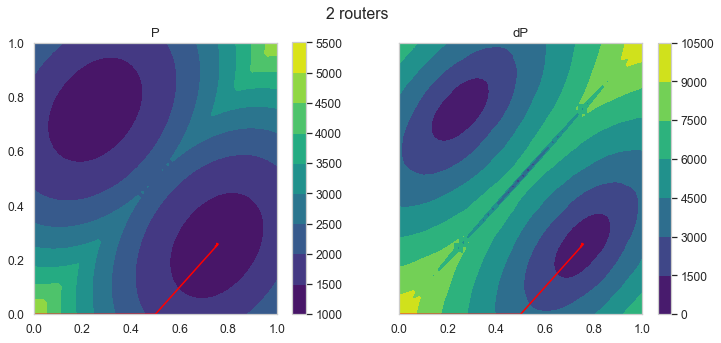

In [103]:
ret = conditional_SGD(x, P, dP_sigma, [0.0, 0.0], 0.0001, 15)

## Задача 18 (5)
Напишите функцию `multi_newton`, которая реализует решение двумерной задачи с $p(d) = d^3$ методом Ньютона и возвращает траекторию работы алгоритма. Сравните результаты для данной задачи с методом стохастического градиентного спуска.

In [140]:
def P(w, x):
    return np.sum(np.power(np.minimum(np.abs(w[1] - x), np.abs(w[0] - x)), 3))

def dP(w, x):
    abs_1 = np.abs(w[0] - x)
    abs_2 = np.abs(w[1] - x)
    le_mask = abs_1 < abs_2
    ge_mask = abs_1 >= abs_2
    dP_dw1 = np.sum(3 * np.square(w[0] - x[le_mask]) * np.sign(w[0] - x[le_mask]))
    dP_dw2 = np.sum(3 * np.square(w[1] - x[ge_mask]) * np.sign(w[1] - x[ge_mask]))
    return [dP_dw1, dP_dw2]

def ddP(w, x):
    abs_1 = np.abs(w[0] - x)
    abs_2 = np.abs(w[0] - x)
    le_mask = abs_1 < abs_2
    ge_mask = abs_1 >= abs_2
    ddP_dw11 = np.sum(6 * (w[0] - x[le_mask]) * np.sign(w[0] - x[le_mask]))
    ddP_dw22 = np.sum(6 * (w[1] - x[ge_mask]) * np.sign(w[1] - x[ge_mask]))
    return [[ddP_dw11, 0.], [0., ddP_dw22]]

In [133]:
def multi_newton(x, P, dP, ddP, w0, Nsteps):
    w = deepcopy(w0)
    traj = [[w0[0], [w0[1]]]]
    for i in range(1, Nsteps + 1):
        w -= np.matmul(np.linalg.inv(ddP(w, x)), dP(w, x))
        traj.append(w)
        
        #visualize
        tmp_w = np.array(traj)
        draw_descent(tmp_w[:, 1], tmp_w[:, 0])
    return traj

In [134]:
N = 1000
l = 1
x = np.random.rand(N)*l

w1 = np.linspace(0,l)
w2 = np.linspace(0,l)

p = np.zeros([w1.shape[0], w1.shape[0]])
dp = np.zeros([w1.shape[0], w1.shape[0]])

i = 0
for w1_ in w1:
    j = 0
    for w2_ in w2:
        p[i][j]  =  P([w1_, w2_], x)
        dp[i][j] = np.linalg.norm(dP([w1_, w2_], x))
        j += 1
    i += 1

In [141]:
ret = multi_newton(x, P, dP, ddP, [0.12, 0.12], 10)
ret

LinAlgError: Singular matrix

In [136]:
def dP_sigma(w, x, p=0.5):
    random_mask = np.array(np.random.binomial(1, p, x.shape), dtype=bool)
    return dP(w, x[random_mask])

def stochastic_gradient_descent(x, P, dP_sigma, w0, mu, Nsteps):
    traj = [[w0[0], w0[1]]]
    w = deepcopy(w0)
    for i in range(1, Nsteps + 1):
        old_grad = dP_sigma(w, x)
        w[0] -= mu * old_grad[0]
        w[1] -= mu * old_grad[1]
        traj.append([w[0], w[1]])
        
        # visualize
        tmp_w = np.array(traj)
        draw_descent(tmp_w[:, 1], tmp_w[:, 0])
    return traj

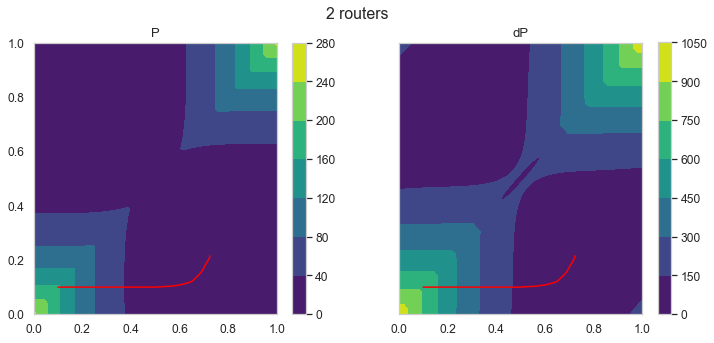

In [139]:
ret = stochastic_gradient_descent(x, P, dP_sigma, [0.1, 0.1], 0.001, 20)

In [ ]:
from IPython.core.display import HTML
def css_styling():
    styles = open("custom.css", "r").read() #or edit path to custom.css
    return HTML(styles)
css_styling()